## Import Data and Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
data = pd.read_csv('stud.csv')
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [3]:
X=data.drop('math_score',axis=1)
X.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [4]:
Y=data['math_score']
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

## Feature Sclaing and Transforming

In [5]:
numerical_features=X.select_dtypes(exclude='object').columns
categorical_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

std=StandardScaler()
oh=OneHotEncoder()

preprocessor=ColumnTransformer([("One Hot Encoder",oh,categorical_features),
                               ("Standard Scaler",std,numerical_features)])

In [6]:
X=preprocessor.fit_transform(X)
X.shape

(1000, 19)

## Model Split

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

## Model Training, Testing and Evaluation

In [8]:
regression_models = [LinearRegression(),Ridge(),Lasso(),KNeighborsRegressor(),DecisionTreeRegressor(),
                     RandomForestRegressor(),CatBoostRegressor(verbose=False),XGBRegressor()]
warnings.filterwarnings('ignore')

model_list=[]
r2_list=[]

for i in regression_models:
    model = i
    model.fit(x_train,y_train)
    
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    train_mae=mean_absolute_error(y_train,y_train_pred)
    test_mae=mean_absolute_error(y_test,y_test_pred)
    
    train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pred))
    test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pred))
    
    train_r2=r2_score(y_train,y_train_pred)
    test_r2=r2_score(y_test,y_test_pred)
    
    print(str(i)[:-2])
    model_list.append(str(i)[:-2])
    r2_list.append(test_r2)
    
    print("Model Performance for Training Set:")
    print("- Mean Absolute Error: ",train_mae.round())
    print("- Root Mean Squared Error: ",train_rmse)
    print("- R2 Score: ",train_r2)
    print('--'*20)
    
    print("Model Performance for Testing Set:")
    print("- Mean Absolute Error: ",test_mae)
    print("- Root Mean Squared Error: ",test_rmse)
    print("- R2 Score: ",test_r2)
    print('=='*20)

LinearRegression
Model Performance for Training Set:
- Mean Absolute Error:  4.0
- Root Mean Squared Error:  5.361337606516466
- R2 Score:  0.8820119671224101
----------------------------------------
Model Performance for Testing Set:
- Mean Absolute Error:  4.306901041666666
- Root Mean Squared Error:  5.348387944144872
- R2 Score:  0.8549347594468542
Ridge
Model Performance for Training Set:
- Mean Absolute Error:  4.0
- Root Mean Squared Error:  5.353786427928747
- R2 Score:  0.8823440936715078
----------------------------------------
Model Performance for Testing Set:
- Mean Absolute Error:  4.285777389673705
- Root Mean Squared Error:  5.3276242510099685
- R2 Score:  0.8560589274584179
Lasso
Model Performance for Training Set:
- Mean Absolute Error:  5.0
- Root Mean Squared Error:  6.565933556728284
- R2 Score:  0.823036126416214
----------------------------------------
Model Performance for Testing Set:
- Mean Absolute Error:  4.627085870255014
- Root Mean Squared Error:  5.88389

## Result

In [9]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Models','R2_Score']).sort_values(by='R2_Score',ascending=False)

,Models,R2_Score
1,Ridge,0.856059
0,LinearRegression,0.854935
6,<catboost.core.CatBoostRegressor object at 0x0...,0.832933
2,Lasso,0.824431
5,RandomForestRegressor,0.812045
7,"XGBRegressor(base_score=None, booster=None, ca...",0.791698
3,KNeighborsRegressor,0.758462
4,DecisionTreeRegressor,0.655457


In [10]:
model=LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=r2_score(y_test,y_pred)
print("R2 Score of the Model is: ",score)

R2 Score of the Model is:  0.8549347594468542


Text(0, 0.5, 'Predicted Values')

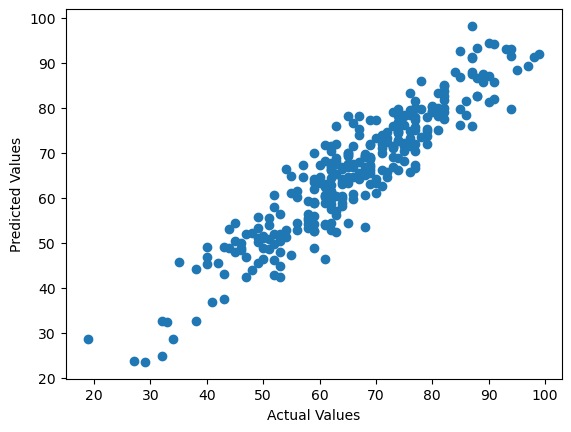

In [11]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

<Axes: xlabel='math_score'>

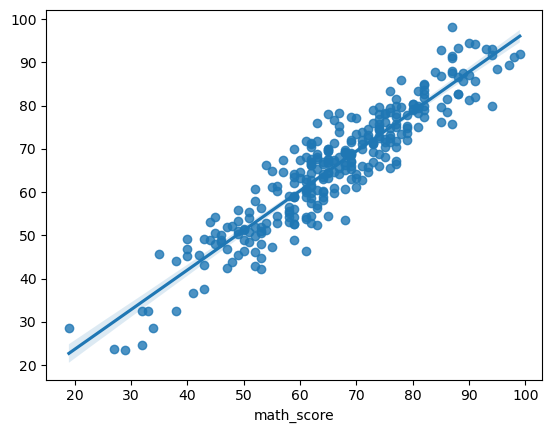

In [12]:
sns.regplot(x=y_test,y=y_pred)